In [187]:
#importing necessary packages

import scipy as sp
import numpy as np
import pandas as pd
import pandas_profiling as pp
#from collections import Counter
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from imblearn.metrics import classification_report_imbalanced
from matplotlib import pyplot as plt

#set seed


#loading csv into dataframe

url = 'https://raw.githubusercontent.com/shantanudeshpande94/bankruptcy-prediction/master/5year.csv'
bankruptcy_df = pd.read_csv(url)

In [189]:
bankruptcy_df.shape

(5910, 65)

In [182]:
#to replace '?' with NA values

bankruptcy_df.replace({'?': None},inplace =True)

In [183]:
#to check null values in a column

bankruptcy_df.isna().sum()

Attr1       3
Attr2       3
Attr3       3
Attr4      21
Attr5      11
         ... 
Attr61     15
Attr62      0
Attr63     21
Attr64    107
class       0
Length: 65, dtype: int64

In [184]:
#converting from object to float64

bankruptcy_df['Attr1'] = pd.to_numeric(bankruptcy_df['Attr1'])
bankruptcy_df['Attr2'] = pd.to_numeric(bankruptcy_df['Attr2'])
bankruptcy_df['Attr3'] = pd.to_numeric(bankruptcy_df['Attr3'])
bankruptcy_df['Attr4'] = pd.to_numeric(bankruptcy_df['Attr4'])
bankruptcy_df['Attr5'] = pd.to_numeric(bankruptcy_df['Attr5'])
bankruptcy_df['Attr6'] = pd.to_numeric(bankruptcy_df['Attr6'])
bankruptcy_df['Attr7'] = pd.to_numeric(bankruptcy_df['Attr7'])
bankruptcy_df['Attr8'] = pd.to_numeric(bankruptcy_df['Attr8'])
bankruptcy_df['Attr9'] = pd.to_numeric(bankruptcy_df['Attr9'])
bankruptcy_df['Attr10'] = pd.to_numeric(bankruptcy_df['Attr10'])
bankruptcy_df['Attr11'] = pd.to_numeric(bankruptcy_df['Attr11'])
bankruptcy_df['Attr12'] = pd.to_numeric(bankruptcy_df['Attr12'])
bankruptcy_df['Attr13'] = pd.to_numeric(bankruptcy_df['Attr13'])
bankruptcy_df['Attr14'] = pd.to_numeric(bankruptcy_df['Attr14'])
bankruptcy_df['Attr15'] = pd.to_numeric(bankruptcy_df['Attr15'])
bankruptcy_df['Attr16'] = pd.to_numeric(bankruptcy_df['Attr16'])
bankruptcy_df['Attr17'] = pd.to_numeric(bankruptcy_df['Attr17'])
bankruptcy_df['Attr18'] = pd.to_numeric(bankruptcy_df['Attr18'])
bankruptcy_df['Attr19'] = pd.to_numeric(bankruptcy_df['Attr19'])
bankruptcy_df['Attr20'] = pd.to_numeric(bankruptcy_df['Attr20'])
bankruptcy_df['Attr21'] = pd.to_numeric(bankruptcy_df['Attr21'])
bankruptcy_df['Attr22'] = pd.to_numeric(bankruptcy_df['Attr22'])
bankruptcy_df['Attr23'] = pd.to_numeric(bankruptcy_df['Attr23'])
bankruptcy_df['Attr24'] = pd.to_numeric(bankruptcy_df['Attr24'])
bankruptcy_df['Attr25'] = pd.to_numeric(bankruptcy_df['Attr25'])
bankruptcy_df['Attr26'] = pd.to_numeric(bankruptcy_df['Attr26'])
bankruptcy_df['Attr27'] = pd.to_numeric(bankruptcy_df['Attr27'])
bankruptcy_df['Attr28'] = pd.to_numeric(bankruptcy_df['Attr28'])
bankruptcy_df['Attr29'] = pd.to_numeric(bankruptcy_df['Attr29'])
bankruptcy_df['Attr30'] = pd.to_numeric(bankruptcy_df['Attr30'])
bankruptcy_df['Attr31'] = pd.to_numeric(bankruptcy_df['Attr31'])
bankruptcy_df['Attr32'] = pd.to_numeric(bankruptcy_df['Attr32'])
bankruptcy_df['Attr33'] = pd.to_numeric(bankruptcy_df['Attr33'])
bankruptcy_df['Attr34'] = pd.to_numeric(bankruptcy_df['Attr34'])
bankruptcy_df['Attr35'] = pd.to_numeric(bankruptcy_df['Attr35'])
bankruptcy_df['Attr36'] = pd.to_numeric(bankruptcy_df['Attr36'])
bankruptcy_df['Attr37'] = pd.to_numeric(bankruptcy_df['Attr37'])
bankruptcy_df['Attr38'] = pd.to_numeric(bankruptcy_df['Attr38'])
bankruptcy_df['Attr39'] = pd.to_numeric(bankruptcy_df['Attr39'])
bankruptcy_df['Attr40'] = pd.to_numeric(bankruptcy_df['Attr40'])
bankruptcy_df['Attr41'] = pd.to_numeric(bankruptcy_df['Attr41'])
bankruptcy_df['Attr42'] = pd.to_numeric(bankruptcy_df['Attr42'])
bankruptcy_df['Attr43'] = pd.to_numeric(bankruptcy_df['Attr43'])
bankruptcy_df['Attr44'] = pd.to_numeric(bankruptcy_df['Attr44'])
bankruptcy_df['Attr45'] = pd.to_numeric(bankruptcy_df['Attr45'])
bankruptcy_df['Attr46'] = pd.to_numeric(bankruptcy_df['Attr46'])
bankruptcy_df['Attr47'] = pd.to_numeric(bankruptcy_df['Attr47'])
bankruptcy_df['Attr48'] = pd.to_numeric(bankruptcy_df['Attr48'])
bankruptcy_df['Attr49'] = pd.to_numeric(bankruptcy_df['Attr49'])
bankruptcy_df['Attr50'] = pd.to_numeric(bankruptcy_df['Attr50'])
bankruptcy_df['Attr51'] = pd.to_numeric(bankruptcy_df['Attr51'])
bankruptcy_df['Attr52'] = pd.to_numeric(bankruptcy_df['Attr52'])
bankruptcy_df['Attr53'] = pd.to_numeric(bankruptcy_df['Attr53'])
bankruptcy_df['Attr54'] = pd.to_numeric(bankruptcy_df['Attr54'])
bankruptcy_df['Attr55'] = pd.to_numeric(bankruptcy_df['Attr55'])
bankruptcy_df['Attr56'] = pd.to_numeric(bankruptcy_df['Attr56'])
bankruptcy_df['Attr57'] = pd.to_numeric(bankruptcy_df['Attr57'])
bankruptcy_df['Attr58'] = pd.to_numeric(bankruptcy_df['Attr58'])
bankruptcy_df['Attr59'] = pd.to_numeric(bankruptcy_df['Attr59'])
bankruptcy_df['Attr60'] = pd.to_numeric(bankruptcy_df['Attr60'])
bankruptcy_df['Attr61'] = pd.to_numeric(bankruptcy_df['Attr61'])
bankruptcy_df['Attr62'] = pd.to_numeric(bankruptcy_df['Attr62'])
bankruptcy_df['Attr63'] = pd.to_numeric(bankruptcy_df['Attr63'])
bankruptcy_df['Attr64'] = pd.to_numeric(bankruptcy_df['Attr64'])

bankruptcy_df.dtypes

bankruptcy_df.mean()


Attr1      -0.022347
Attr2       0.465086
Attr3       0.189155
Attr4       4.892476
Attr5      19.406758
             ...    
Attr61     10.941497
Attr62    241.978184
Attr63      9.127741
Attr64     65.276716
class       0.069374
Length: 65, dtype: float64

(5910, 65)

In [185]:
#check profile report of the dataset

profile = bankruptcy_df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="output.html")

In [7]:
# dropping duplicate values 

bankruptcy_df.drop_duplicates(keep=False,inplace=True) 

In [8]:
#delete because of large number of missing values

del bankruptcy_df['Attr37']

In [9]:
#imputing missing values by mean

bankruptcy_df.fillna(bankruptcy_df.mean(), inplace=True)

#number of missing values

bankruptcy_df.isna().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
         ..
Attr61    0
Attr62    0
Attr63    0
Attr64    0
class     0
Length: 64, dtype: int64

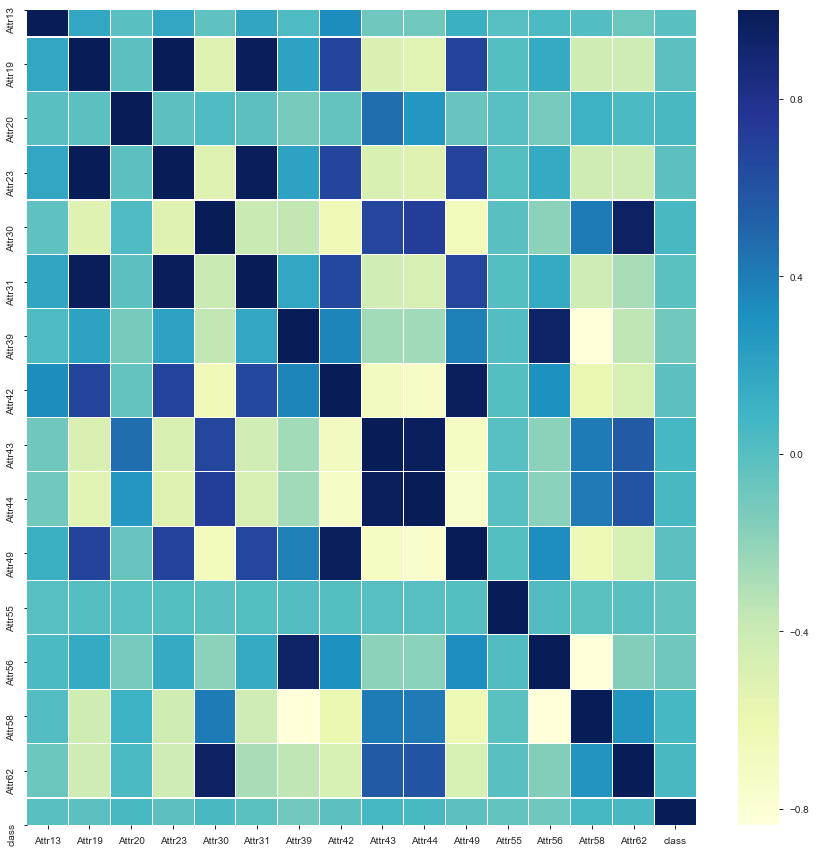

In [10]:
#delete because of high correlation

bankruptcy_df = bankruptcy_df.drop(['Attr11','Attr16','Attr18','Attr22','Attr23','Attr26','Attr31','Attr33',
        'Attr34','Attr35','Attr38','Attr4','Attr40','Attr44','Attr46','Attr48','Attr49','Attr50','Attr54',
        'Attr56','Attr60','Attr62','Attr63','Attr64','Attr7','Attr8'], axis = 1)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

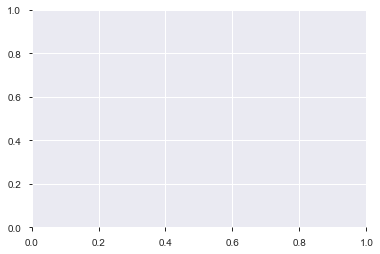

In [12]:
bankruptcy_df.shape

(5790, 38)

# FEATURE SELECTION USING RANDOM FOREST

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [15]:
# Create a list of feature names
feature_labels = ['Attr1','Attr2','Attr3','Attr5','Attr6','Attr9','Attr10',
              'Attr12','Attr13','Attr14','Attr15','Attr17','Attr19','Attr20',
              'Attr21','Attr24','Attr25','Attr27','Attr28','Attr29','Attr30',
              'Attr32','Attr36','Attr39',
              'Attr41','Attr42','Attr43','Attr45','Attr47',
              'Attr51','Attr52','Attr53','Attr55','Attr57','Attr58','Attr59',
               'Attr61']

In [88]:
#Create X from the features
X = bankruptcy_df[feature_labels].values

# Create y from output
y = bankruptcy_df['class'].values.ravel()

# Create a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
rf_clf.fit(X, y)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, rf_clf.feature_importances_):
    print(feature)

In [17]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.03
sfm = SelectFromModel(rf_clf, threshold=0.03)

# Train the selector
sfm.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=0, verbose=0,
     

In [18]:
#Print the names of the most important features

for feature_list_index in sfm.get_support(indices=True):
    print(feature_labels[feature_list_index])

Attr21
Attr24
Attr27
Attr39
Attr41
Attr42
Attr58


In [51]:
X_imp_features = sfm.transform(X)

In [84]:
#converting X_filtered to Dataframe

X_imp_features = pd.DataFrame(data=X_imp_features,
          index=np.arange(1, 5791),
          columns=np.arange(1, 8))


In [89]:
y.shape

(5790,)

# SMOTE+ENN & RANDOM FOREST MODEL

In [82]:
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.combine import SMOTEENN
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score

In [96]:
from sklearn.model_selection import StratifiedKFold
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

t_n = []
f_p = []
f_n = []
t_p = []
cv = StratifiedKFold(n_splits=5)
for train_idx, test_idx, in cv.split(X_imp_features, y):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    X_train, y_train = SMOTEENN().fit_resample(X_train, y_train)
    clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_rf_pred = clf.predict(X_test)
    accuracy_score(y_test, y_rf_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_rf_pred).ravel()
    t_n.append(tn)
    f_p.append(fp)
    f_n.append(fn)
    t_p.append(tp)
    print("True Negatives: ",tn)
    print("False Positives: ",fp)
    print("False Negatives: ",fn)
    print("True Positives: ",tp)
return np.array(t_n)
return np.array(f_p)
return np.array(f_n)
return np.array(t_p)

True Negatives:  992
False Positives:  85
False Negatives:  35
True Positives:  47
True Negatives:  975
False Positives:  102
False Negatives:  19
True Positives:  62
True Negatives:  949
False Positives:  128
False Negatives:  25
True Positives:  56
True Negatives:  971
False Positives:  106
False Negatives:  33
True Positives:  48
True Negatives:  984
False Positives:  92
False Negatives:  26
True Positives:  55


SyntaxError: 'return' outside function (<ipython-input-96-fdca2ea514f9>, line 29)

In [109]:
Avg_tn = round(sum(t_n)/len(t_n))
Avg_fp = round(sum(f_p)/len(f_p))
Avg_fn = round(sum(f_n)/len(f_n))
Avg_tp = round(sum(t_p)/len(t_p))

In [144]:
import math

#Specificity
Specificity_rf = Avg_tn/(Avg_tn+Avg_fp) 
print("Specificity {:0.2f}".format(Specificity_rf))

#Recall 
Recall_rf = Avg_tp/(Avg_tp+Avg_fn) 
print("Recall / Sensitivity {:0.2f}".format(Recall_rf))

#Precision
Precision_rf = Avg_tp/(Avg_tp + Avg_fp)

#GMean
GM_rf = math.sqrt(Specificity_rf*Recall_rf)
print("Geometric Mean Score {:0.2f}".format(GM_rf))

Specificity 0.90
Recall / Sensitivity 0.66
Geometric Mean Score 0.77


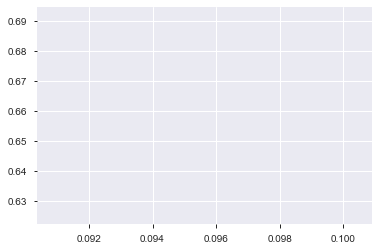

ValueError: diff requires input that is at least one dimensional

# SMOTE+ENN & DECISION TREE

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

from sklearn.model_selection import StratifiedKFold
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

tn_dt = []
fp_dt = []
fn_dt = []
tp_dt = []
cv = StratifiedKFold(n_splits=5)
for train_idx_dt, test_idx_dt, in cv.split(X_imp_features, y):
    X_train_dt, y_train_dt = X[train_idx_dt], y[train_idx_dt]
    X_test_dt, y_test_dt = X[test_idx_dt], y[test_idx_dt]
    X_train_dt, y_train_dt = SMOTEENN().fit_resample(X_train_dt, y_train_dt)
    
    dt = DecisionTreeClassifier()
    dt.fit(X_train_dt, y_train_dt)
    y_dt_pred = dt.predict(X_test_dt)
    accuracy_score(y_test_dt, y_dt_pred)
    tn, fp, fn, tp = confusion_matrix(y_test_dt, y_dt_pred).ravel()
    tn_dt.append(tn)
    fp_dt.append(fp)
    fn_dt.append(fn)
    tp_dt.append(tp)
    print("True Negatives: ",tn)
    print("False Positives: ",fp)
    print("False Negatives: ",fn)
    print("True Positives: ",tp)
return np.array(tn_dt)
return np.array(fp_dt)
return np.array(fn_dt)
return np.array(tp_dt)

True Negatives:  956
False Positives:  121
False Negatives:  38
True Positives:  44
True Negatives:  953
False Positives:  124
False Negatives:  22
True Positives:  59
True Negatives:  911
False Positives:  166
False Negatives:  23
True Positives:  58
True Negatives:  941
False Positives:  136
False Negatives:  32
True Positives:  49
True Negatives:  928
False Positives:  148
False Negatives:  31
True Positives:  50


SyntaxError: 'return' outside function (<ipython-input-127-e8ad2fb9e34c>, line 34)

In [128]:
Avg_tn_dt = round(sum(tn_dt)/len(tn_dt))
Avg_fp_dt = round(sum(fp_dt)/len(fp_dt))
Avg_fn_dt = round(sum(fn_dt)/len(fn_dt))
Avg_tp_dt = round(sum(tp_dt)/len(tp_dt))

In [142]:
import math

#Specificity
Specificity_dt = Avg_tn_dt/(Avg_tn_dt+Avg_fp_dt) 
print("Specificity {:0.2f}".format(Specificity_dt))

#Recall 
Recall_dt = Avg_tp_dt/(Avg_tp_dt+Avg_fn_dt) 
print("Recall / Sensitivity {:0.2f}".format(Recall_dt))

#Precision
Precision_dt = Avg_tp_dt/(Avg_tp_dt + Avg_fp_dt)

#GMean
GM_dt = math.sqrt(Specificity_dt*Recall_dt)
print("Geometric Mean Score {:0.2f}".format(GM_dt))

Specificity 0.87
Recall / Sensitivity 0.64
Geometric Mean Score 0.75


# SMOTE+ENN & KNN

In [192]:
import numpy as np
from sklearn import neighbors
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

from sklearn.model_selection import StratifiedKFold
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

tn_knn = []
fp_knn = []
fn_knn = []
tp_knn = []
cv = StratifiedKFold(n_splits=5)
for train_idx_knn, test_idx_knn, in cv.split(X_imp_features, y):
    X_train_knn, y_train_knn = X[train_idx_knn], y[train_idx_knn]
    X_test_knn, y_test_knn = X[test_idx_knn], y[test_idx_knn]
    X_train_knn, y_train_knn = SMOTEENN().fit_resample(X_train_knn, y_train_knn)
    
    clf_knn = neighbors.KNeighborsClassifier()
    clf_knn.fit(X_train_knn, y_train_knn)
    
    y_knn_pred = clf_knn.predict(X_test_knn)
    accuracy_score(y_test_knn, y_knn_pred)
    tn, fp, fn, tp = confusion_matrix(y_test_knn, y_knn_pred).ravel()
    tn_knn.append(tn)
    fp_knn.append(fp)
    fn_knn.append(fn)
    tp_knn.append(tp)
    print("True Negatives: ",tn)
    print("False Positives: ",fp)
    print("False Negatives: ",fn)
    print("True Positives: ",tp)
return np.array(tn_knn)
return np.array(fp_knn)
return np.array(fn_knn)
return np.array(tp_knn)

TypeError: Singleton array array(0.65853659) cannot be considered a valid collection.

In [133]:
Avg_tn_knn = round(sum(tn_knn)/len(tn_knn))
Avg_fp_knn = round(sum(fp_knn)/len(fp_knn))
Avg_fn_knn = round(sum(fn_knn)/len(fn_knn))
Avg_tp_knn = round(sum(tp_knn)/len(tp_knn))

In [141]:
import math

#Specificity
Specificity_knn = Avg_tn_knn/(Avg_tn_knn+Avg_fp_knn) 
print("Specificity {:0.2f}".format(Specificity_knn))

#Recall 
Recall_knn = Avg_tp_knn/(Avg_tp_knn+Avg_fn_knn) 
print("Recall / Sensitivity {:0.2f}".format(Recall_knn))

#Precision
Precision_knn = Avg_tp_knn/(Avg_tp_knn + Avg_fp_knn)

#GMean
GM_knn = math.sqrt(Specificity_knn*Recall_knn)
print("Geometric Mean Score {:0.2f}".format(GM_knn))

Specificity 0.76
Recall / Sensitivity 0.62
Geometric Mean Score 0.69


# SMOTE+ENN & ADABOOST

In [136]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

import numpy as np
from sklearn import neighbors
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

from sklearn.model_selection import StratifiedKFold
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

tn_ada = []
fp_ada = []
fn_ada = []
tp_ada = []
cv = StratifiedKFold(n_splits=5)
for train_idx_ada, test_idx_ada, in cv.split(X_imp_features, y):
    X_train_ada, y_train_ada = X[train_idx_ada], y[train_idx_ada]
    X_test_ada, y_test_ada = X[test_idx_ada], y[test_idx_ada]
    X_train_ada, y_train_ada = SMOTEENN().fit_resample(X_train_ada, y_train_ada)
    
    ada_classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200)
    ada_classifier.fit(X_train_ada, y_train_ada)
    
    #clf_knn = neighbors.KNeighborsClassifier()
    #clf_knn.fit(X_train_knn, y_train_knn)
    
    y_ada_pred = ada_classifier.predict(X_test_ada)
    accuracy_score(y_test_ada, y_ada_pred)
    tn, fp, fn, tp = confusion_matrix(y_test_ada, y_ada_pred).ravel()
    tn_ada.append(tn)
    fp_ada.append(fp)
    fn_ada.append(fn)
    tp_ada.append(tp)
    print("True Negatives: ",tn)
    print("False Positives: ",fp)
    print("False Negatives: ",fn)
    print("True Positives: ",tp)
return np.array(tn_ada)
return np.array(fp_ada)
return np.array(fn_ada)
return np.array(tp_ada)

True Negatives:  992
False Positives:  85
False Negatives:  38
True Positives:  44
True Negatives:  959
False Positives:  118
False Negatives:  16
True Positives:  65
True Negatives:  919
False Positives:  158
False Negatives:  20
True Positives:  61
True Negatives:  959
False Positives:  118
False Negatives:  24
True Positives:  57
True Negatives:  951
False Positives:  125
False Negatives:  18
True Positives:  63


SyntaxError: 'return' outside function (<ipython-input-136-d57de1b0ce85>, line 53)

In [137]:
Avg_tn_ada = round(sum(tn_ada)/len(tn_ada))
Avg_fp_ada = round(sum(fp_ada)/len(fp_ada))
Avg_fn_ada = round(sum(fn_ada)/len(fn_ada))
Avg_tp_ada = round(sum(tp_ada)/len(tp_ada))

In [143]:
import math

#Specificity
Specificity_ada = Avg_tn_ada/(Avg_tn_ada+Avg_fp_ada) 
print("Specificity {:0.2f}".format(Specificity_ada))

#Recall 
Recall_ada = Avg_tp_ada/(Avg_tp_ada+Avg_fn_ada) 
print("Recall / Sensitivity {:0.2f}".format(Recall_ada))

#Precision
Precision_ada = Avg_tp_ada/(Avg_tp_ada + Avg_fp_ada)

#GMean
GM_ada = math.sqrt(Specificity_ada*Recall_ada)
print("Geometric Mean Score {:0.2f}".format(GM_ada))

Specificity 0.89
Recall / Sensitivity 0.72
Geometric Mean Score 0.80


# PLOTTING GRAPHS

In [147]:
Specificity_comparison = {'Random Forest': Specificity_rf, 'Decision Tree': Specificity_dt, 'KNN': Specificity_knn, 'Adaboost': Specificity_ada}

In [148]:
Specificity_comparison

{'Random Forest': 0.904363974001857,
 'Decision Tree': 0.8709377901578459,
 'KNN': 0.7620817843866171,
 'Adaboost': 0.8876508820798514}

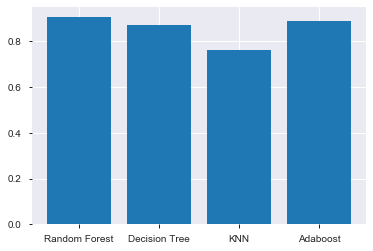

In [173]:
plt.bar(range(len(Specificity_comparison)), list(Specificity_comparison.values()), align='center')
plt.xticks(range(len(Specificity_comparison)), list(Specificity_comparison.keys()))

plt.show()

In [154]:
Sensitivity_comparison = {'Random Forest': Recall_rf, 'Decision Tree': Recall_dt, 'KNN': Recall_knn, 'Adaboost': Recall_ada}

In [155]:
Sensitivity_comparison

{'Random Forest': 0.6585365853658537,
 'Decision Tree': 0.6419753086419753,
 'KNN': 0.6219512195121951,
 'Adaboost': 0.7160493827160493}

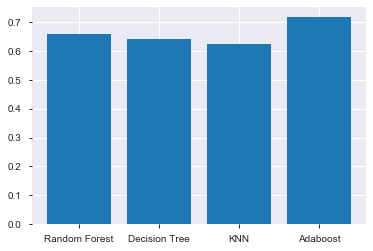

In [174]:
plt.bar(range(len(Sensitivity_comparison)), list(Sensitivity_comparison.values()), align='center')
plt.xticks(range(len(Sensitivity_comparison)), list(Sensitivity_comparison.keys()))

plt.show()

In [156]:
Gmean_comparison = {'Random Forest': GM_rf, 'Decision Tree': GM_dt, 'KNN': GM_knn, 'Adaboost': GM_ada}

In [157]:
Gmean_comparison

{'Random Forest': 0.7717232427282961,
 'Decision Tree': 0.7477436436670947,
 'KNN': 0.6884603802451426,
 'Adaboost': 0.7972464275119923}

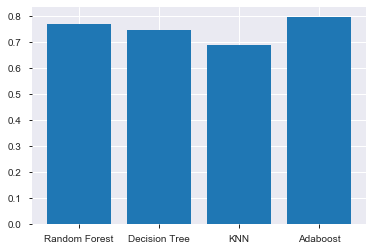

In [175]:
plt.bar(range(len(Gmean_comparison)), list(Gmean_comparison.values()), align='center')
plt.xticks(range(len(Gmean_comparison)), list(Gmean_comparison.keys()))

plt.show()

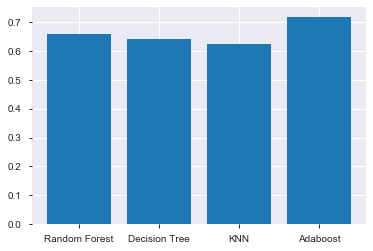

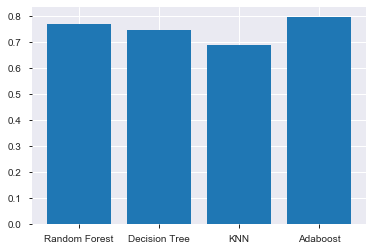